In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [ ]:
class FusionModel:
    def __init__(self, ohlc_dim, sentiment_dim, output_dim, hidden_dim):
        self.w1 = np.random.randn(ohlc_dim + sentiment_dim, hidden_dim) * 0.01
        self.b1 = np.zeros((1, hidden_dim))
        self.w2 = np.random.randn(hidden_dim, hidden_dim) * 0.01
        self.b2 = np.zeros((1, hidden_dim))
        self.w3 = np.random.randn(hidden_dim, output_dim) * 0.01
        self.b3 = np.zeros((1, output_dim))

        self.ohlc_dim = ohlc_dim
        self.sentiment_dim = sentiment_dim
        self.output_dim = output_dim
        self.hidden_dim = hidden_dim

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivate(self, x):
        return (x > 0).astype(float)

    def forward(self, x):
        self.z1 = np.dot(x, self.w1) + self.b1
        self.a1 = self.relu(self.z1)

        self.z2 = np.dot(self.a1, self.w2) + self.b2
        self.a2 = np.tanh(self.z2)  # Using tanh here for better gradient flow

        self.z3 = np.dot(self.a2, self.w3) + self.b3

        return self.z3

    def loss_fn(self, y_pred, y_true):
        return np.mean(np.square(y_true - y_pred))

    def backward(self, x, y_true, y_pred, lr):
        n = x.shape[0]
        d_loss = 2 * (y_pred - y_true) / n

        d_w3 = np.dot(self.a2.T, d_loss)
        d_b3 = np.sum(d_loss, axis=0, keepdims=True)

        d_hidden_2 = np.dot(d_loss, self.w3.T) * (1 - np.tanh(self.z2) ** 2)  # tanh derivative
        d_w2 = np.dot(self.a1.T, d_hidden_2)
        d_b2 = np.sum(d_hidden_2, axis=0, keepdims=True)

        d_hidden_1 = np.dot(d_hidden_2, self.w2.T) * self.relu_derivate(self.z1)
        d_w1 = np.dot(x.T, d_hidden_1)
        d_b1 = np.sum(d_hidden_1, axis=0, keepdims=True)

        self.w1 -= lr * d_w1
        self.b1 -= lr * d_b1
        self.w2 -= lr * d_w2
        self.b2 -= lr * d_b2
        self.w3 -= lr * d_w3
        self.b3 -= lr * d_b3

        # Debug: Gradient norm check
        # print("Grad norm w3:", np.linalg.norm(d_w3))

    def train(self, ohlc_vector, sentiment, y, epochs, lr):
        x = np.concatenate((ohlc_vector, sentiment), axis=1)

        # Normalize inputs
        x = (x - np.mean(x, axis=0)) / (np.std(x, axis=0) + 1e-8)

        for epoch in range(epochs):
            y_pred = self.forward(x)
            loss = self.loss_fn(y_pred, y)
            self.backward(x, y, y_pred, lr)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.6f}")

    def predict(self, ohlc_vector, sentiment):
        x = np.concatenate((ohlc_vector, sentiment), axis=1)
        x = (x - np.mean(x, axis=0)) / (np.std(x, axis=0) + 1e-8)  # apply same normalization
        return self.forward(x)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sentiment_analysis import preprocess, RandomForestClassifier
from regression import polynomial_features, StandardScaler, gradient_descent, predict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error

# Load dataset
data = pd.read_csv("/content/All_new.csv")
companies = ['AAPL', 'ADBE', 'AMZN', 'BIDU', 'CSCO', 'EA', 'GOOG', 'IBM', 'INTC', 'MSFT', 'NTES', 'NVDA', 'ORCL', 'QCOM', 'TXN']

# Use consistent data segment
data = data[1000:1700].copy()

# Sentiment preprocessing
data['text'] = data['Top1'] + " " + data['Top2'] + " " + data['Top3'] + " " + data['Top4'] + " " + data['Top5']
data['cleaned'] = data['text'].apply(preprocess)

# TF-IDF on sentiment text
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 1), min_df=5)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['cleaned'])
X_sent = tfidf_matrix.toarray().astype(np.float32)
y_sent = data['Label'].astype(np.int8).values
X_sent_train, X_sent_test = X_sent[:500], X_sent[500:700]
y_sent_train, y_sent_test = y_sent[:500], y_sent[500:700]

# Train sentiment model
rf = RandomForestClassifier(n_trees=200, max_depth=10)
rf.fit(X_sent_train, y_sent_train)
sentiment_output = rf.predict(X_sent_test).reshape(-1, 1)



Tree 1 trained.
Tree 2 trained.
Tree 3 trained.
Tree 4 trained.
Tree 5 trained.
Tree 6 trained.
Tree 7 trained.
Tree 8 trained.
Tree 9 trained.
Tree 10 trained.
Tree 11 trained.
Tree 12 trained.
Tree 13 trained.
Tree 14 trained.
Tree 15 trained.
Tree 16 trained.
Tree 17 trained.
Tree 18 trained.
Tree 19 trained.
Tree 20 trained.
Tree 21 trained.
Tree 22 trained.
Tree 23 trained.
Tree 24 trained.
Tree 25 trained.
Tree 26 trained.
Tree 27 trained.
Tree 28 trained.
Tree 29 trained.
Tree 30 trained.
Tree 31 trained.
Tree 32 trained.
Tree 33 trained.
Tree 34 trained.
Tree 35 trained.
Tree 36 trained.
Tree 37 trained.
Tree 38 trained.
Tree 39 trained.
Tree 40 trained.
Tree 41 trained.
Tree 42 trained.
Tree 43 trained.
Tree 44 trained.
Tree 45 trained.
Tree 46 trained.
Tree 47 trained.
Tree 48 trained.
Tree 49 trained.
Tree 50 trained.
Tree 51 trained.
Tree 52 trained.
Tree 53 trained.
Tree 54 trained.
Tree 55 trained.
Tree 56 trained.
Tree 57 trained.
Tree 58 trained.
Tree 59 trained.
Tree 6


=== AAPL ===
Iteration 0: Cost = 2939.442919
Iteration 1000: Cost = 393.716399
Iteration 2000: Cost = 55.905143
Iteration 3000: Cost = 10.069617
Iteration 4000: Cost = 3.728941
Iteration 5000: Cost = 2.766407
Iteration 6000: Cost = 2.555365
Iteration 7000: Cost = 2.462232
Iteration 8000: Cost = 2.396740
Iteration 9000: Cost = 2.343782
Iteration 10000: Cost = 2.299350
Iteration 11000: Cost = 2.261493
Iteration 12000: Cost = 2.228909
Iteration 13000: Cost = 2.200630
Iteration 14000: Cost = 2.175915
Iteration 15000: Cost = 2.154181
Iteration 16000: Cost = 2.134966
Iteration 17000: Cost = 2.117898
Iteration 18000: Cost = 2.102671
Iteration 19000: Cost = 2.089035
Epoch 0, Loss: 12855.226800
Epoch 100, Loss: 7.101844
Epoch 200, Loss: 6.035960
Epoch 300, Loss: 5.609817
Epoch 400, Loss: 5.451247
Epoch 500, Loss: 5.323597
Epoch 600, Loss: 5.243398
Epoch 700, Loss: 5.167275
Epoch 800, Loss: 5.115990
Epoch 900, Loss: 5.090397
Fusion predictions sample: [97.03309528 97.05066619 97.07286145 97.091

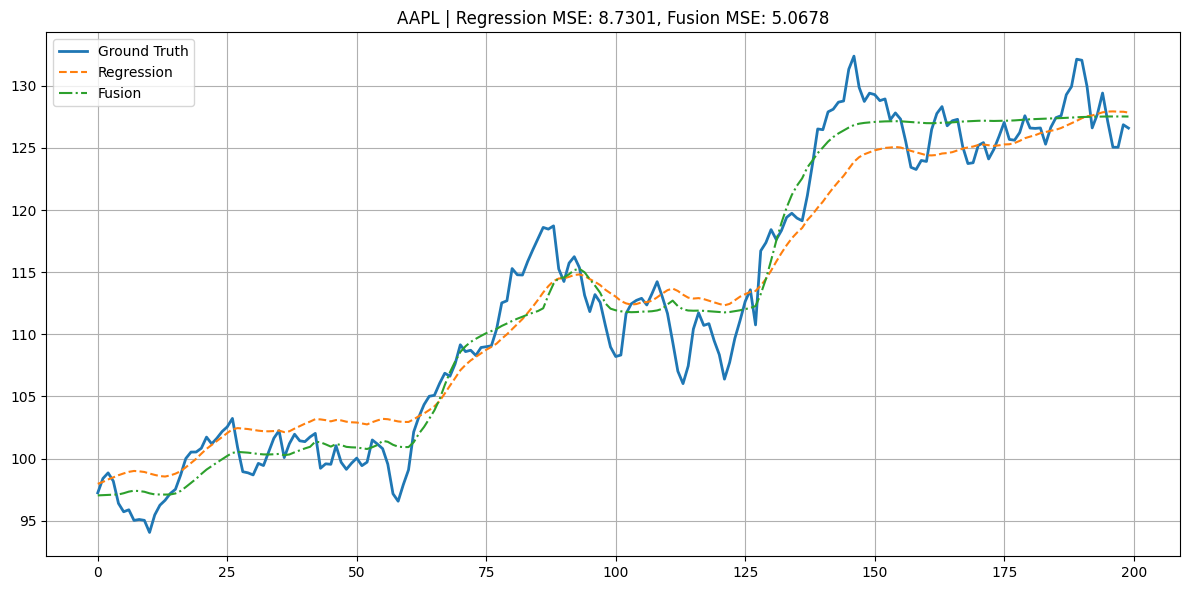

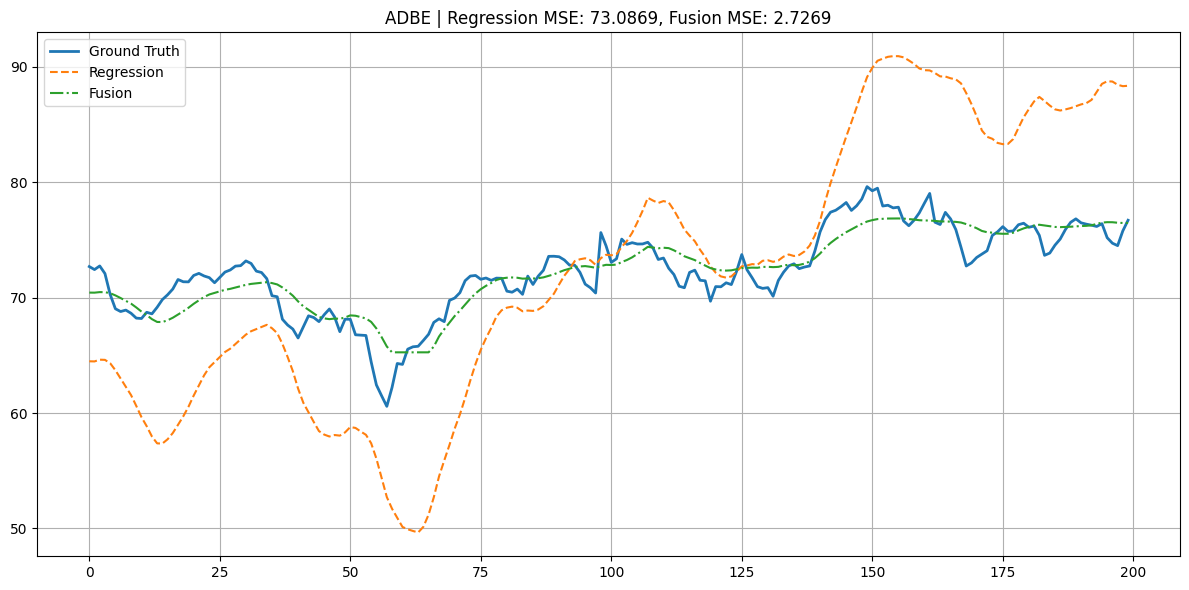

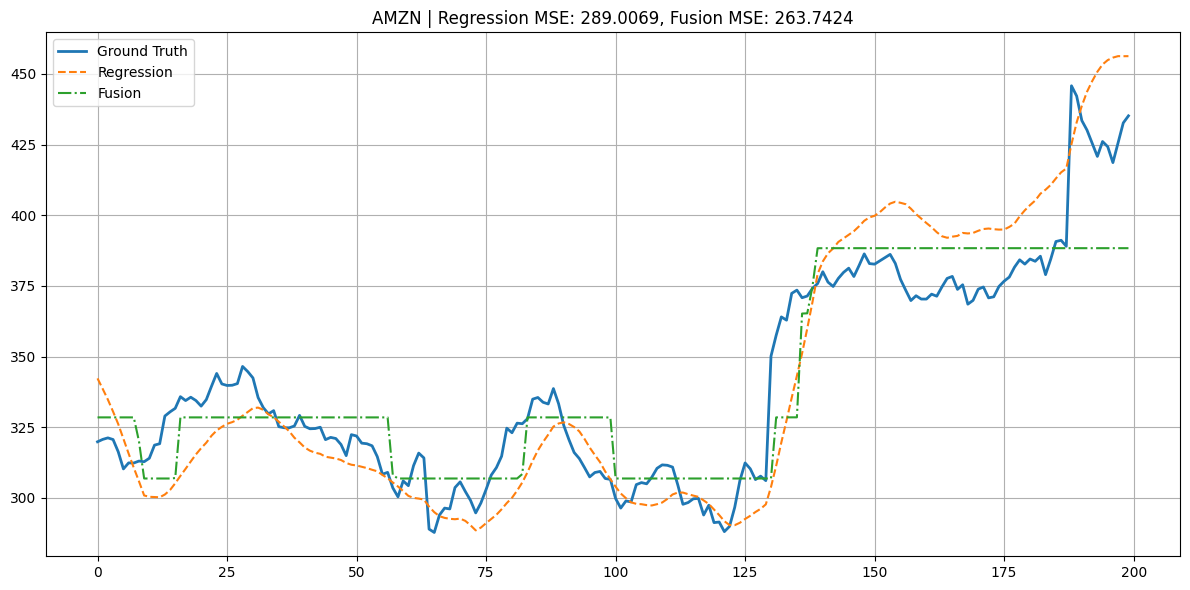

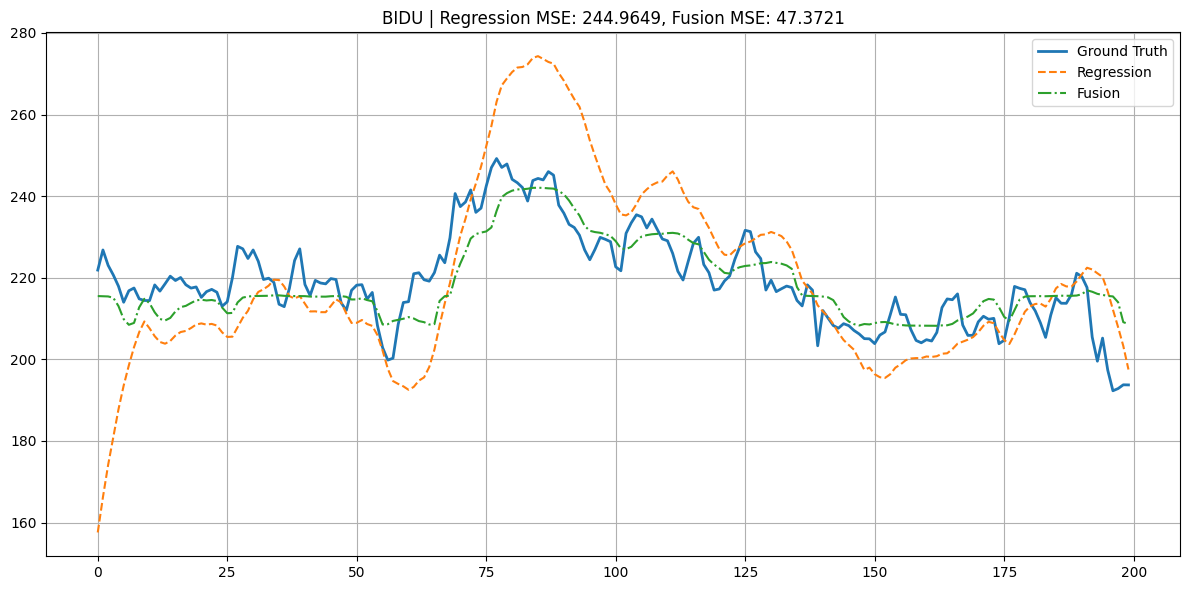

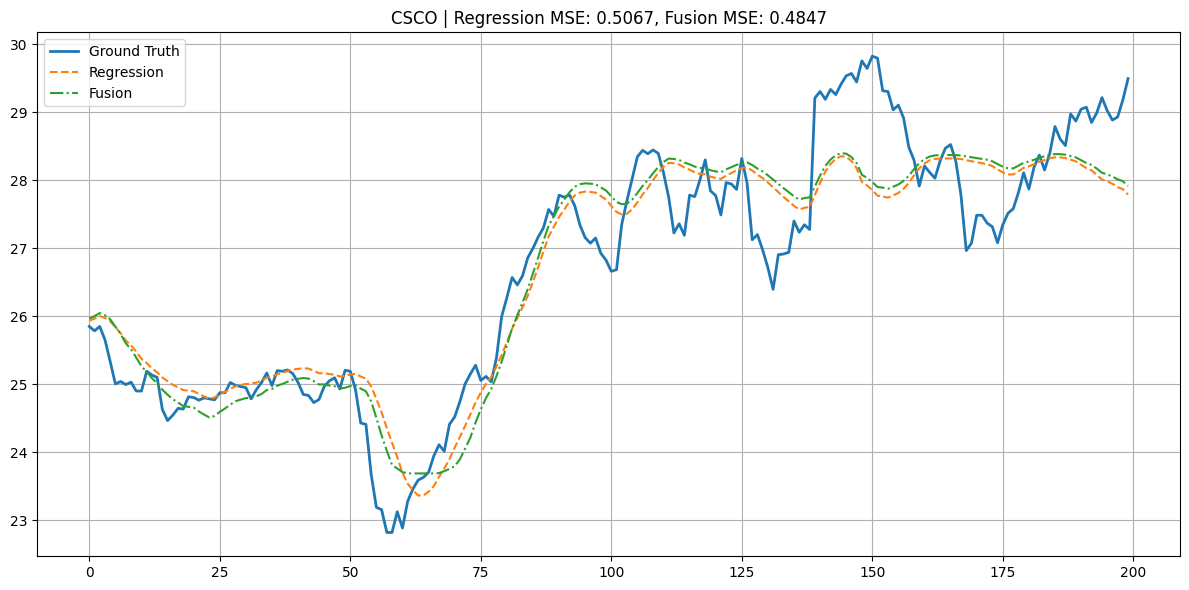

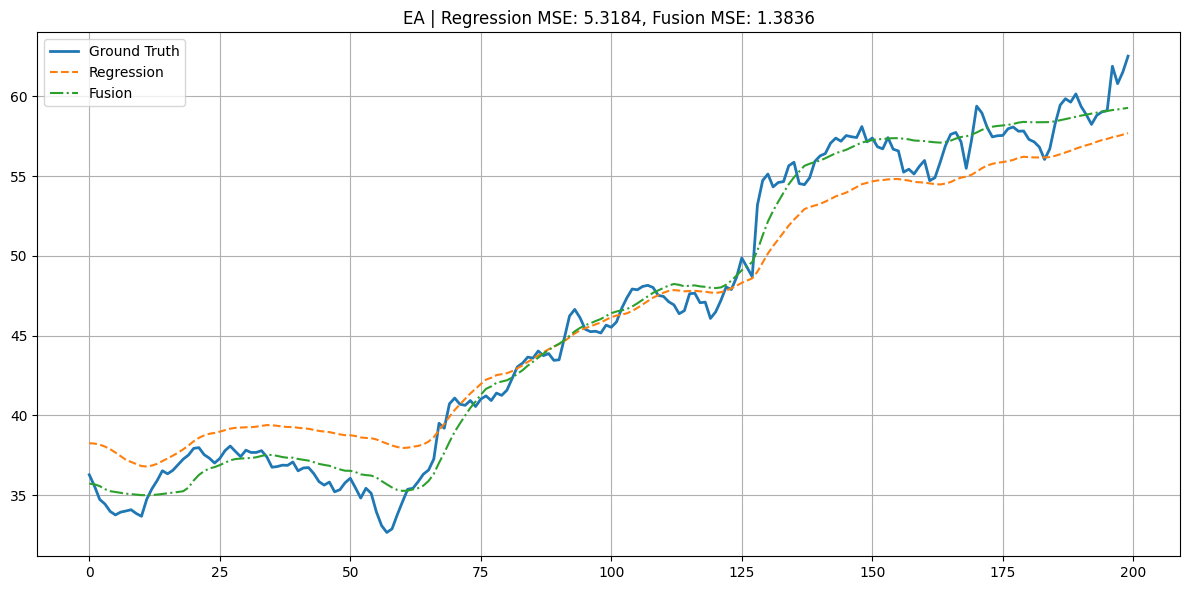

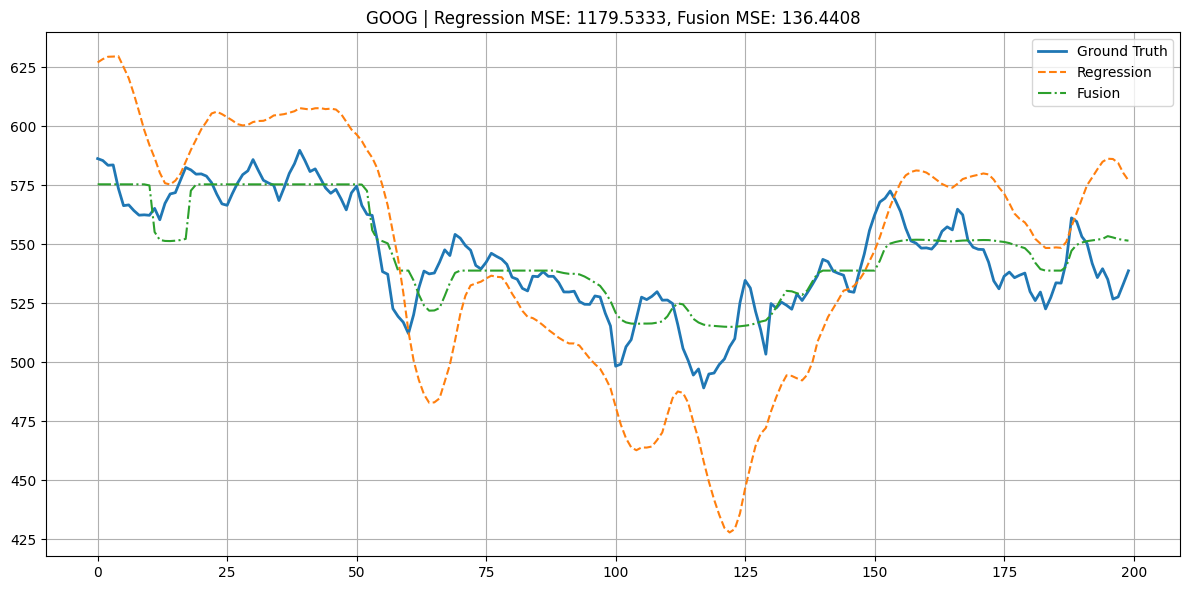

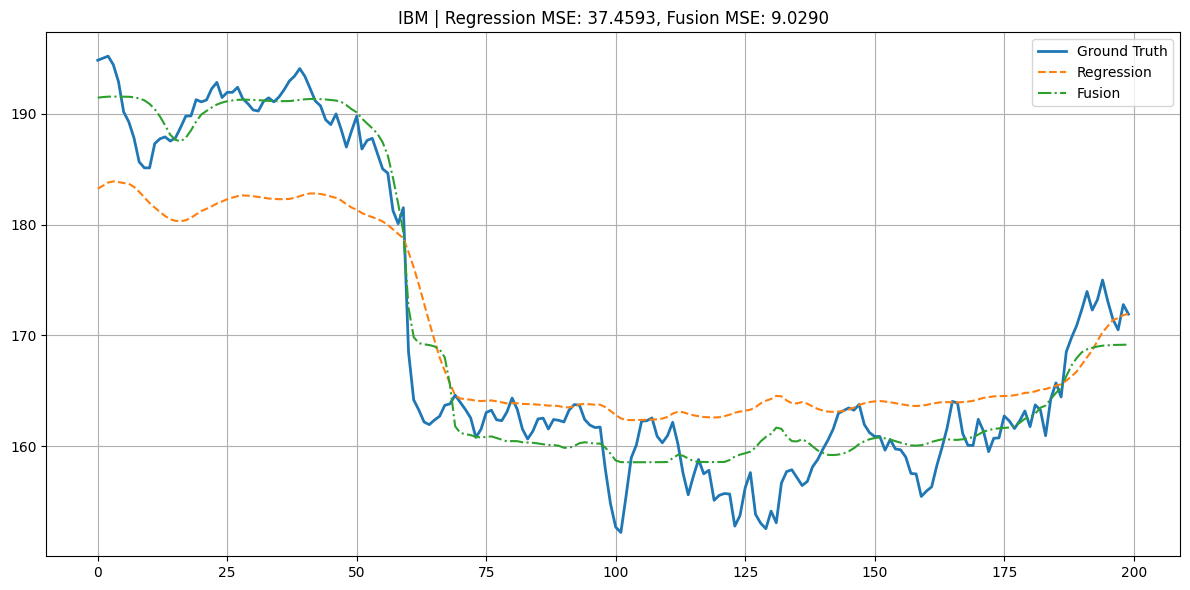

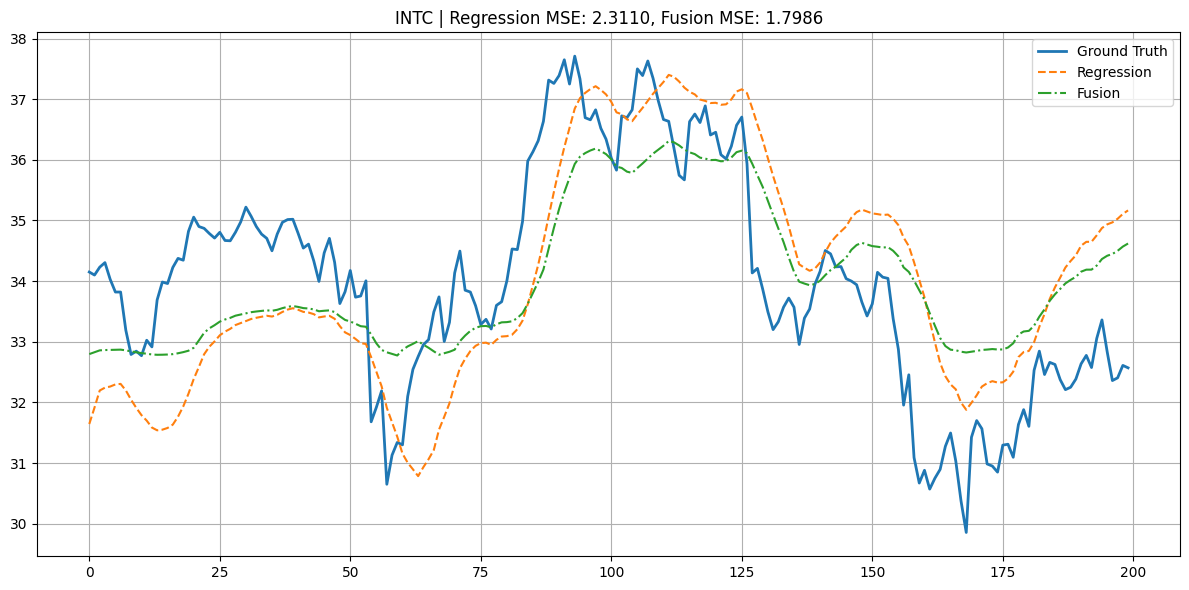

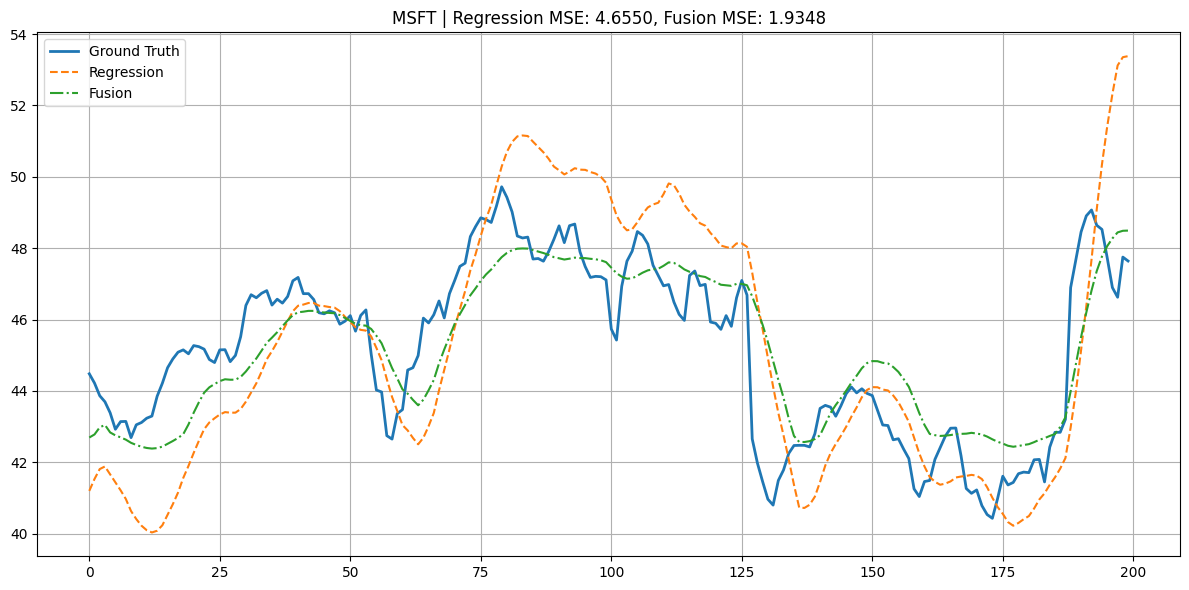

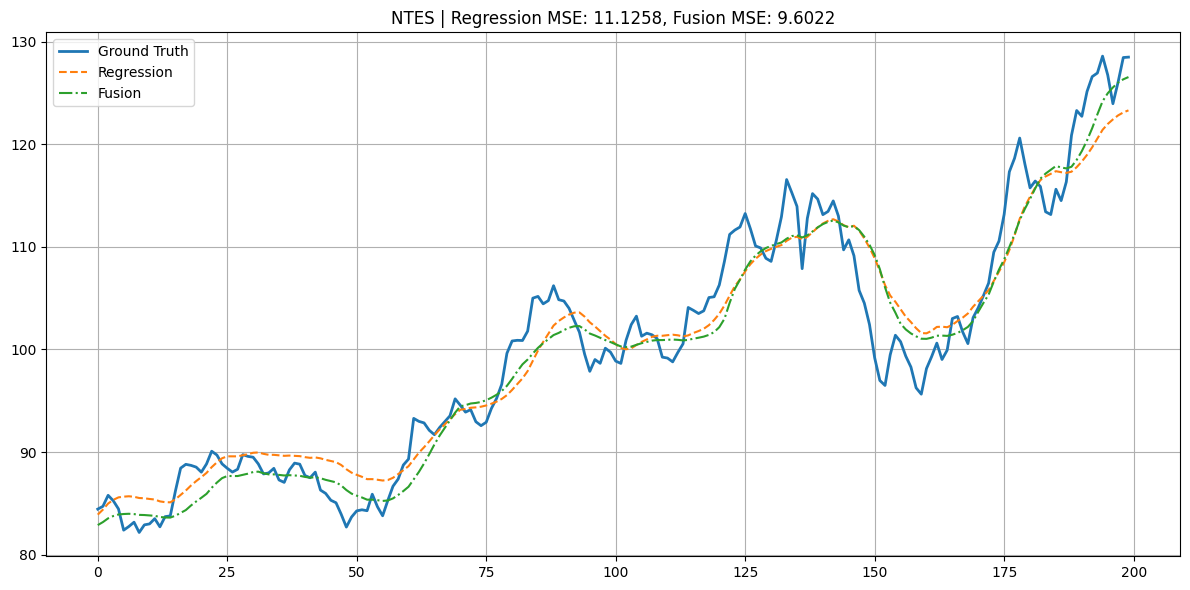

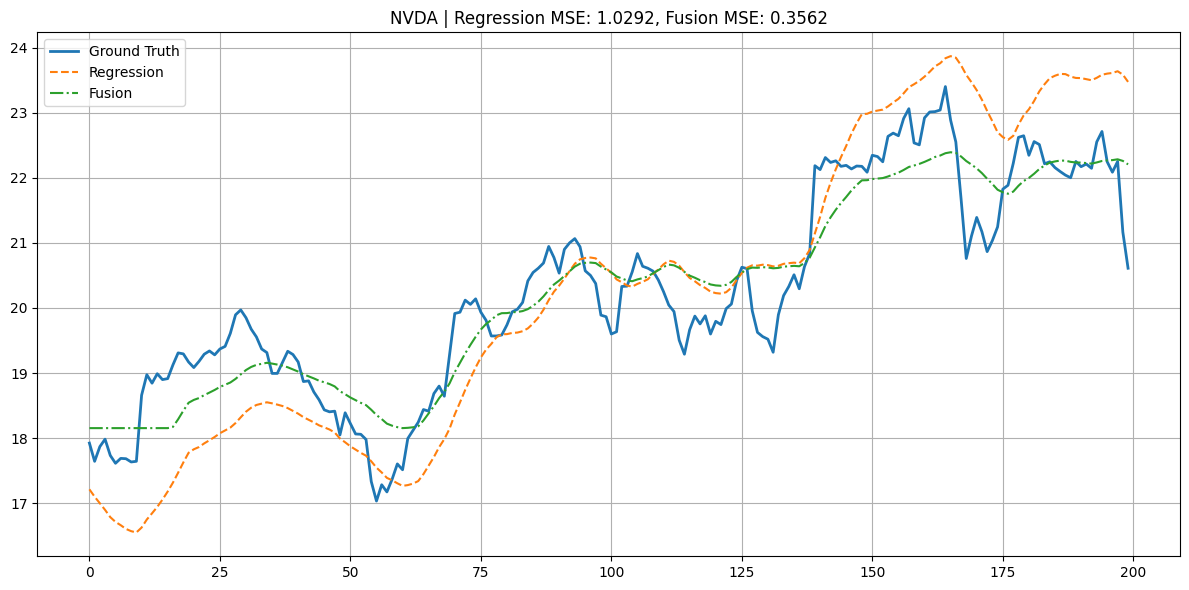

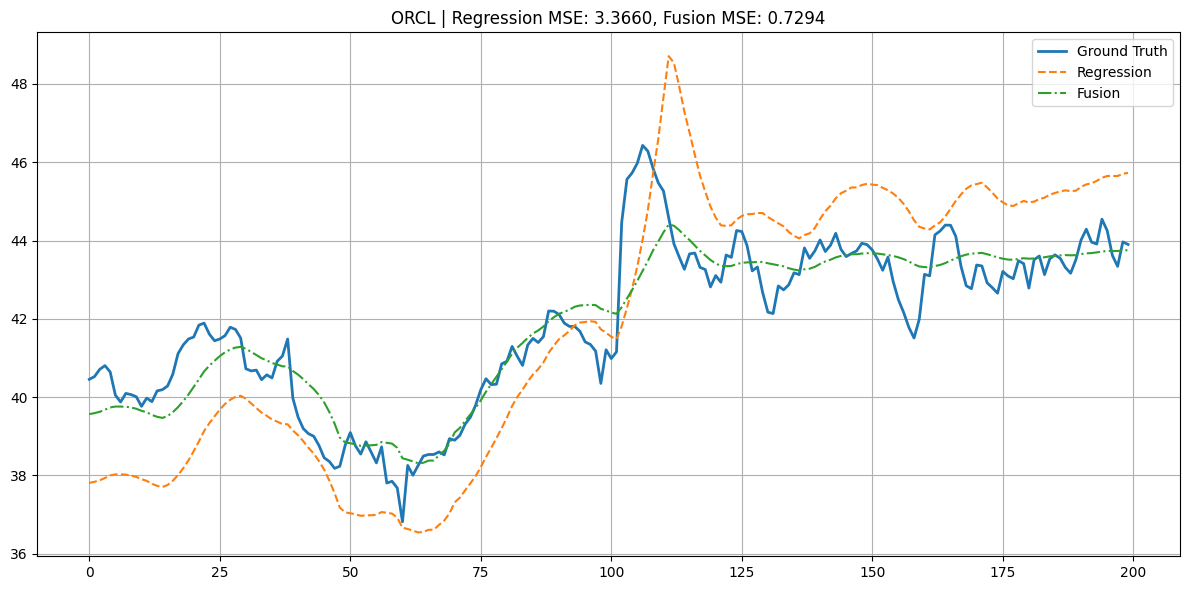

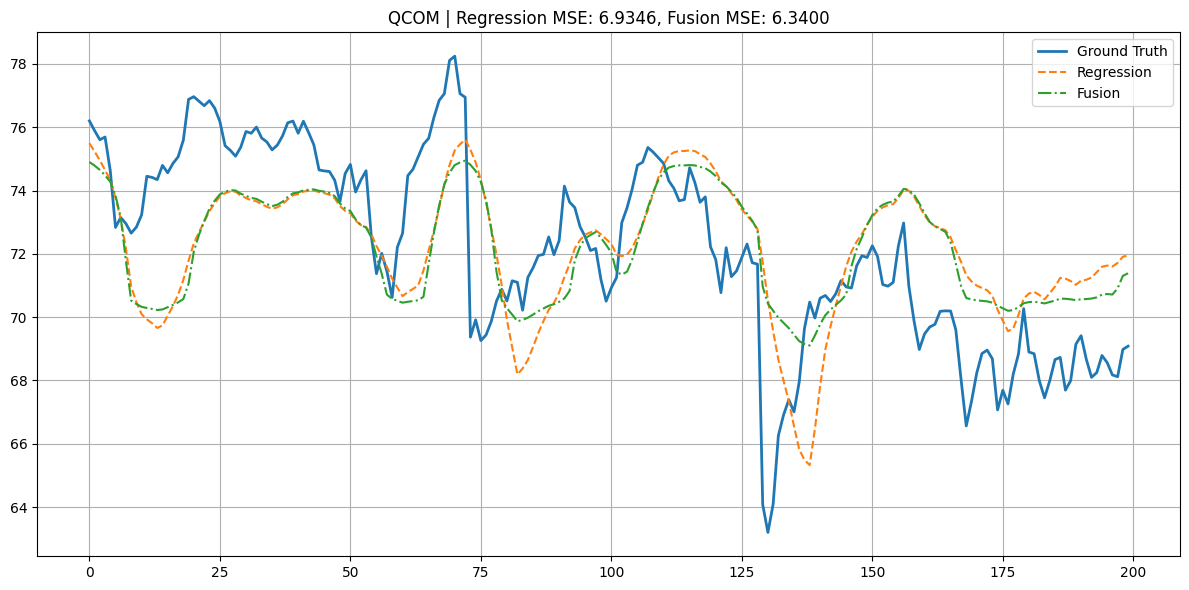

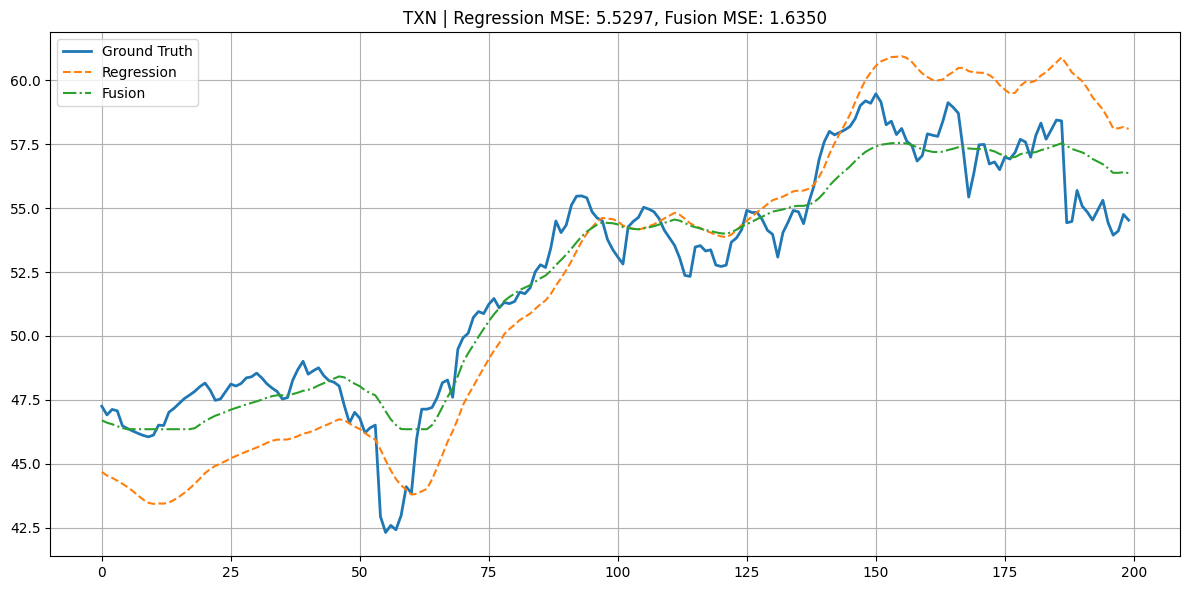

In [ ]:
companies = ['AAPL', 'ADBE', 'AMZN', 'BIDU', 'CSCO', 'EA', 'GOOG', 'IBM', 'INTC', 'MSFT', 'NTES', 'NVDA', 'ORCL', 'QCOM', 'TXN']

results = []
plots = []

for company in companies:
    try:
        print(f"\n=== {company} ===")
        data["avg"] = (data[f"{company}_High"] + data[f"{company}_Low"]) / 2
        data["rolling_avg_10d"] = data["avg"].rolling(window=10).mean()
        data["rolling_avg_10d"] = data["rolling_avg_10d"].fillna(data["avg"])

        dates = np.arange(1000, 1700).reshape(-1, 1)
        rolling_avg = data["rolling_avg_10d"].values.reshape(-1, 1)
        X_reg = np.hstack([dates, rolling_avg])
        y_reg = data["avg"].values

        X_train_reg, X_test_reg = X_reg[:500], X_reg[500:700]
        y_train_reg, y_test_reg = y_reg[:500], y_reg[500:700]

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_reg)
        X_test_scaled = scaler.transform(X_test_reg)

        degree = 10
        X_poly_train = polynomial_features(X_train_scaled, degree)
        X_poly_test = polynomial_features(X_test_scaled, degree)

        w0 = np.zeros(X_poly_train.shape[1])
        b0 = 0
        w_final, b_final, _ = gradient_descent(X_poly_train, y_train_reg, w0, b0, *X_poly_train.shape, iterations=20000, alpha=0.001)

        ohlc_output = predict(X_poly_test, w_final, b_final).reshape(-1, 1)
        mean_shift = np.mean(y_test_reg - ohlc_output)
        ohlc_output += mean_shift

        reg_mse = mean_squared_error(y_test_reg, ohlc_output)
        y_fusion = y_test_reg.reshape(-1, 1)

        x_fusion = np.concatenate((ohlc_output, sentiment_output), axis=1)
        std = np.std(x_fusion, axis=0)
        std[std == 0] = 1e-8
        x_fusion = (x_fusion - np.mean(x_fusion, axis=0)) / std

        fusion_model = FusionModel(ohlc_dim=1, sentiment_dim=1, output_dim=1, hidden_dim=32)
        for epoch in range(1000):
            y_pred = fusion_model.forward(x_fusion)
            loss = fusion_model.loss_fn(y_pred, y_fusion)

            if np.isnan(loss):
                print(f"NaN loss at epoch {epoch}. Stopping training.")
                break

            fusion_model.backward(x_fusion, y_fusion, y_pred, lr=0.01)
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.6f}")

        fusion_preds = fusion_model.forward(x_fusion)

        if np.isnan(fusion_preds).any():
            print(f"Fusion model failed for {company} (NaN predictions)")
            continue

        print(f"Fusion predictions sample: {fusion_preds[:5].flatten()}")
        print(f"Prediction variance: {np.var(fusion_preds):.6f}, min: {np.min(fusion_preds):.4f}, max: {np.max(fusion_preds):.4f}")

        fusion_mse = mean_squared_error(y_fusion, fusion_preds)
        results.append((company, reg_mse, fusion_mse))

        fig, ax = plt.subplots(figsize=(12, 6))
        ax.plot(y_test_reg, label='Ground Truth', linewidth=2)
        ax.plot(ohlc_output, label='Regression', linestyle='--')
        ax.plot(fusion_preds, label='Fusion', linestyle='-.')
        ax.set_title(f"{company} | Regression MSE: {reg_mse:.4f}, Fusion MSE: {fusion_mse:.4f}")
        ax.legend()
        ax.grid(True)
        fig.tight_layout()
        plots.append(fig)

    except Exception as e:
        print(f"Skipped {company} due to error: {e}")

for fig in plots:
    fig.show()

print("\n=== MSE Summary ===")
total_reg_mse = 0
total_fusion_mse = 0
count = 0

for comp, reg, fus in results:
    print(f"{comp}: Regression MSE = {reg:.4f}, Fusion MSE = {fus:.4f}")
    total_reg_mse += reg
    total_fusion_mse += fus
    count += 1

print("\n=== Overall Average MSE ===")
print(f"Avg Regression MSE: {total_reg_mse / count:.4f}")
print(f"Avg Fusion MSE    : {total_fusion_mse / count:.4f}")
